 <a id="top"></a> <br>
 # <div style="text-align: center">Classification Algorithm with Logistic Regression. </div>

## Contents
1. [Introduction to the project](#1)
    
1. [Problem statement](#2)
    
1. [Statistical background of Logistic regression.](#3)
    
1. [Data and library Import](#4)
    
1. [Exploratory data analysis(EDA).](#5)
    1. [Investigating data](#5.1)
    1. [Data Visualization](#5.2)
    
1. [Model fitting.](#6)
    
1. [Model Validation](#7)
    1. [Cofussion matrix](#7.1)
    
1. [ Feature Engineering.](#8)
    
1. [Model Improvement](#9)
    
1. [Model Depolyment.](#10)

1. [Conclution.](#11)

<a id="1"></a> 
## Introduction to this project.
### Business Value
Advertisemnt is a very important undertaking for any serious business out there.It is obvious in the business domain that advertisement is there to inform to ,educate and remind customers of a new product or a service.In order for any business to continue investing in ads,the management needs to be very sure if their ads are getting noticed by usersor even how likely their ad will be noticed.It is also important for advertisng firms to know which ads are more likely to be clicked by users so that they concentarate on them and find a way to improve the ones that are not geting noticed.This in turn will increase their profits either way.

<a id="2"></a> 
## Problem Statement

This ML project requires me to predict accurately whether an ad will be clicked by a user or not.I will attempt to build a classification model based on the collected data by a group of data scientists over a long period of time.

<a id="3"></a>
## Statistical background of Logistic regression.

Logistic regression is a Classification Machine learning algorithm that groups observations into distinct groups.In case of two groups we have what is called binary logistic regression.The following analogy takes us to the core root of logistic regression in a the simplest way posible.

The fundamental generalised linear model takes the form:

$$g(E(y)) = \beta_0+\beta_1 x_i$$
where;

$g():$ is the link function

$E(y):$ is the expectation of the response variable.

$\beta_0+\beta_1 x_i:$ is the linear predictor.

Lets say we have the following linear equation:

$$g(y) = \beta_0+\beta_1x_i -------------->1$$

And we know that logistic regression is concerned with probability of success or failure.The probabilities are mutualy exclusive.In order to get the probability of success which is represented with p,the following equation holds.

$$p(x) = e^{(\beta_0+\beta_1 x_i)} -------------->2$$

Again,this probability p must be less than one so we will devide p by a larger number.

$$p(x) = \frac{e^{(\beta_0+\beta_1 x_i)}}{e^{(\beta_0+\beta_1 x_i)}+1} -------------->3$$

Now based on 1,2,and 3,we can reorganize the probability p to

$$p(x) = \frac{e^y}{1+e^y}$$

But q = 1-p ,therefore;

$$q(x) = 1-\frac{e^y}{1+e^y}$$

$$=\frac{1+e^y - e^y}{1+e^y}$$

$$=\frac{1}{1+e^y}$$

hence ;

$$\frac{p(x)}{1-p(x)} = \frac{e^y}{1+e^y} \div \frac{1}{1+e^y}$$

$$\frac{p(x)}{1-p(x)} = \frac{e^y}{1+e^y} \times \frac{1+e^y}{1}$$

$$\frac{p(x)}{1-p(x)} = e^y$$

now taking the log both sides we have:

$$ln(\frac{p(x)}{1-p(x)} )=ln( e^y)$$

$$ln(\frac{p(x)}{1-p(x)} )= \beta_0+\beta_1 x_i$$

And there we are at the logistic regression equation,with $\frac{p(x)}{1-p(x)}$ as the odd ratio.

### Describing performance of a ligistic regression.

Performance of the logistic regression can be described by the folowing :

1. **CONFUSION MATRIX**

**Accuracy**:This can be deine by the use of a confusion matrix.
    A confusion matrix has the following main parts:
* True Negative - Targets which are actually true$(Y)$ and we have predicted them true$(Y)$.
* True Negative - Targets which are actually false $(N)$ and we have predicted them false $(N)$
* False Positive - Targets which are actually false $(N)$ but we have predicted them true$(Y)$
* False Negative - Targets which are actually true $(Y)$ but we have predicted them false $(N)$

Accuracy is therefore given by:
$$accuracy = \frac{True Positive+True Nehative}{True Positive+True Nehative+False Positive+False Negatives}$$

**Precision**It is ameasure of correctness achieved in true prediction that is observations marked as true.
$$Precision = \frac{True Positive}{True Positive+True Negative}$$

**Sensitivity/Recal** - Measure of actual predictions which are predicted correctly 
$$Sensitivity = \frac{True Positive}{True Negative+False Positive}$$

**Specificity** - How many observations of false class are labbeled correctly.
$$Specificity = \frac{True Negative}{True Negative + False positive}$$

1. <b>ROC Curve - Receiver Operator Characteristic curve</b>

This is constructed by ploting the true positive rate vs false positive rate.The area under the curve ,refered as index of accuracy or accordance index ,is perfect perfremance metric for ROC curve.A higher area indicates a better prediction power of the model.



<a id="4"></a>
## Data  and library Import

[back to top](#top)



In [104]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [105]:
#data
ad_data = pd.read_csv('advertising.csv')

<a id="5"></a>
## Exploratory data analysis(EDA).

In exploratory it is important to examine data throughly to get a clear view of what data is made up of.This takes the form of the data frame shape ,distributons and relationships.

<a id="5.1"></a>
### Investigating data
[back to top](#top)

In [106]:
ad_data.shape

(1000, 10)

In [107]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [108]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [109]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [110]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [111]:
# def dataInformer(data):
#     features =data.columns
#     shape = data.shape
#     head = data.head()
#     description = data.describe()
#     about = [shape,features,head,description]
#     for i in about:
#         print(i)
#         print("===="*13)
# dataInformer(ad_data)

In [112]:
type(ad_data)

pandas.core.frame.DataFrame

We can observe the following basic information from the above outputs:
1. We are dealing with a data stored in a data frame format.
2. The data is made if 1000 observations and 10 variables.
3. Of the ten Variables six are numeric.
4. Data has no missing values.

<a id = "5.2"></a>
### Data Visualization

1. Target Variable

[back to top](#top)

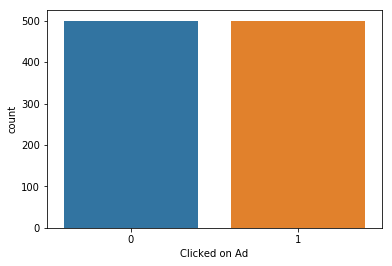

In [113]:
target = ad_data['Clicked on Ad'].count()
ad_data['Clicked on Ad'].value_counts()
sns.countplot(ad_data['Clicked on Ad'])

2. Explanatory variables

/Users/admin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


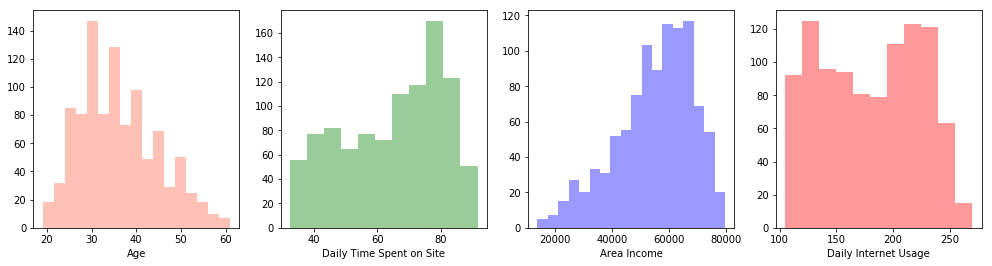

In [114]:
fig,axes = plt.subplots(1,4,figsize = (17,4))
sns.distplot(ad_data['Age'],kde = False,ax = axes[0],color="Tomato")
sns.distplot(ad_data['Daily Time Spent on Site'],kde = False,ax = axes[1],color="green")
sns.distplot(ad_data['Area Income'],kde = False,ax = axes[2],color="blue")
sns.distplot(ad_data['Daily Internet Usage'],kde = False,ax = axes[3],color="red")
plt.show()

Observations from above.

    * Age,Daily time spent shows a nearly normal distribution.

    * Area income is skewed and would need transformation before subjecting the data to modeling.

    * Daily internet Usage show some unfriendly shape,this can be considered later in feature engeneering

3. Bivariate analysis

This part shows the relationship between variables

[back to top](#top)

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

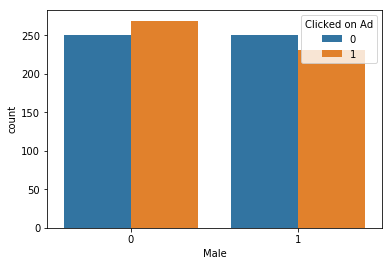

In [115]:
sns.countplot(data=ad_data,x='Male',hue="Clicked on Ad")
ad_data.columns

* More females are seen above to be clicking adds as compared to males.

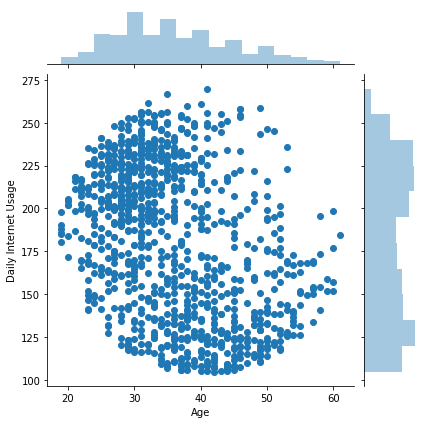

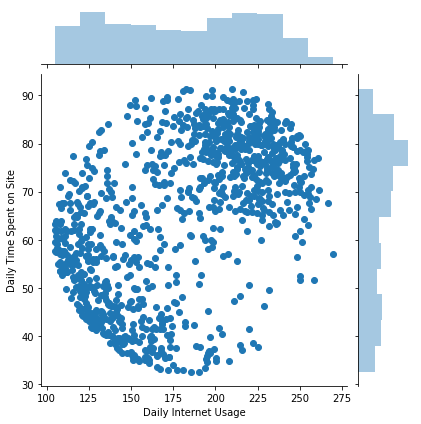

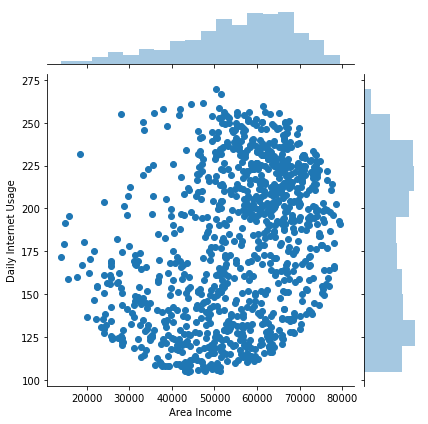

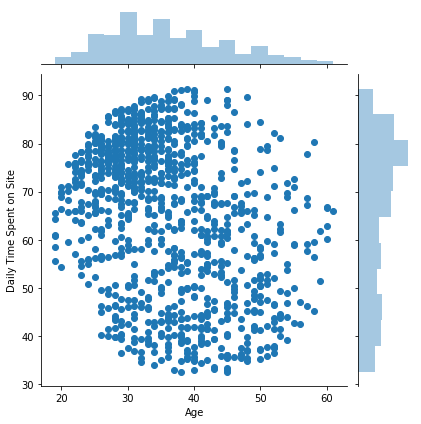

In [116]:
sns.jointplot(data = ad_data,x="Age",y='Daily Internet Usage')
sns.jointplot(data = ad_data,x="Daily Internet Usage",y='Daily Time Spent on Site')
sns.jointplot(data = ad_data,x="Area Income",y='Daily Internet Usage')
sns.jointplot(data = ad_data,x="Age",y='Daily Time Spent on Site')

Finally a pairplot and a correclation heatmap will enable us more visualization.

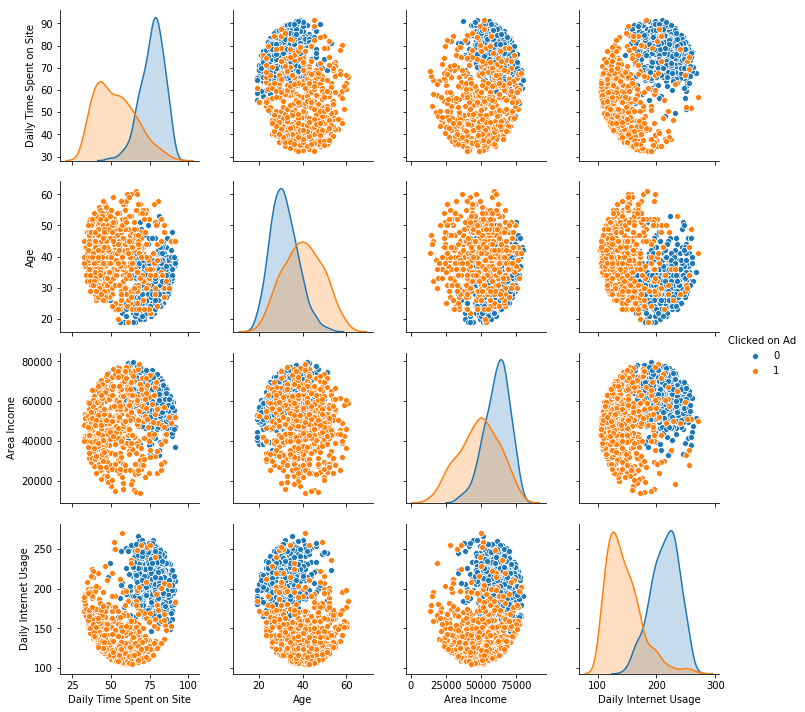

In [117]:
sns.pairplot(ad_data,hue="Clicked on Ad",vars=['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage'])

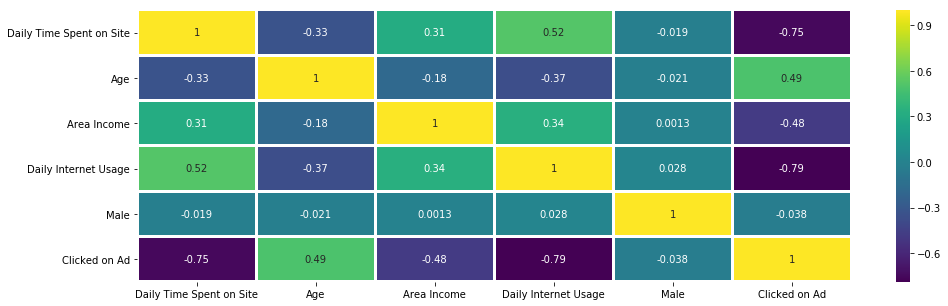

In [118]:
plt.figure(figsize=(16,5))
sns.heatmap(ad_data.corr(),annot = True,cmap="viridis",lw="2")

* We can see thatDaily internet usage is negatively corelated with age.

* Daily time spent online is highly correlatedwith daily internet usage.

<a id="6"></a>
## Model fitting.
[back to top](#top)

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]

In [121]:
y = ad_data['Clicked on Ad']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

Now to apply logistic regression.

In [123]:
from sklearn.linear_model import LogisticRegression

In [124]:
logit = LogisticRegression()

In [125]:
logit.fit(X_train,y_train)

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

And basically this trains my model based on logistic regression

<a id="7"></a>
## Model Validation
[back to top](#top)

In [126]:
preds = logit.predict(X_test)

In order to create a classification report.

In [127]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [128]:
print(classification_report(y_test,preds))
print("======"*13)
print(accuracy_score(y_test,preds))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       147
           1       0.92      0.82      0.87       153

   micro avg       0.87      0.87      0.87       300
   macro avg       0.88      0.87      0.87       300
weighted avg       0.88      0.87      0.87       300

0.8733333333333333


<a id="7.1"></a>
Confussion matrix

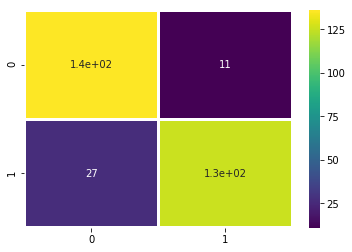

In [129]:

sns.heatmap(confusion_matrix(y_test,preds),annot=True,cmap="viridis",lw="2")

The two reports above provided that we had a 92% accuracy in classification.


<a id="8"></a>
## Feature Engineering

With alittle feature engeneering ,we can improve the model.

In [130]:
from datetime import datetime
ad_data['Timestamp'] = pd.to_datetime(ad_data.Timestamp,format='%Y-%m-%d %H:%M')

From here i will create four new variables from the timestamp column which are:

* Year
* Month
* Day
* Hour

[back to top](#top)

In [131]:
ad_data['year'] = ad_data.Timestamp.dt.year
ad_data['month'] = ad_data.Timestamp.dt.month
ad_data['day'] = ad_data.Timestamp.dt.day
ad_data['Hour'] = ad_data.Timestamp.dt.hour

Again for the days feature  I am going to catgorise week days separately from weekends.

In [132]:
ad_data['day_of_week']=ad_data['Timestamp'].dt.dayofweek

In [133]:
def weekday(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0
    
finder = ad_data['Timestamp'].apply(weekday)
ad_data['weekend'] = finder

In [134]:
finaldata = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Clicked on Ad', 'year', 'month', 'day', 'Hour',
       'day_of_week', 'weekend']]

<a id="10"></a>
## Model Depolyment.

[back to top](#top)

In [135]:
X = finaldata[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male','year', 'month', 'day',
       'Hour', 'day_of_week', 'weekend']]
               

In [136]:
y = finaldata['Clicked on Ad']

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [138]:
logit.fit(X_train,y_train)

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [139]:
preds = logit.predict(X_test)

In [140]:
print(classification_report(y_test,preds))
print("======"*13)
print(accuracy_score(y_test,preds))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        99
           1       0.97      0.93      0.95       101

   micro avg       0.95      0.95      0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200

0.95


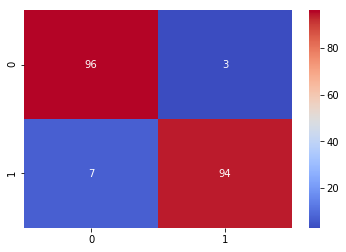

In [141]:
sns.heatmap(confusion_matrix(y_test,preds),annot=True,cmap="coolwarm")

By performing some little hyper parameter tunning ,my model accuracy improved by three percent to 95% percent!From 17 misclassified to 10 misclassified.

In [142]:
from sklearn.metrics import roc_curve,roc_auc_score

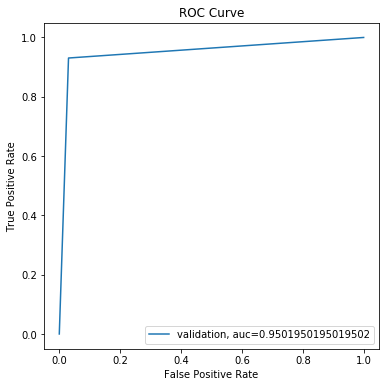

In [143]:
false_positive_rate, true_positive_rate, _ = roc_curve(y_test,  preds)
auc = roc_auc_score(y_test, preds)
plt.figure(figsize=(6,6))
plt.plot(false_positive_rate,true_positive_rate,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.legend(loc=4)
plt.show()

In [144]:
min_train = X_train.min()
range_train = (X_train - min_train).max()
X_train_scaled = (X_train - min_train)/range_train

In [145]:
X_train_scaled.dropna(axis=1,inplace=True)

In [146]:
logit.fit(X_train_scaled,y_train)

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [147]:
min_test = X_test.min()
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test

In [148]:
X_test_scaled.dropna(axis=1,inplace=True)

In [149]:
preds = logit.predict(X_test_scaled)

              precision    recall  f1-score   support

           0       0.92      0.99      0.96        99
           1       0.99      0.92      0.95       101

   micro avg       0.95      0.95      0.95       200
   macro avg       0.96      0.96      0.95       200
weighted avg       0.96      0.95      0.95       200

0.955


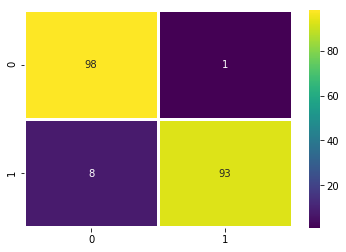

In [150]:
print(classification_report(y_test,preds))
print("======"*13)
sns.heatmap(confusion_matrix(y_test,preds),annot=True,cmap="viridis",lw = 2)
print("======"*13)
print(accuracy_score(y_test,preds))

<a id="11"></a>
## Conclusion

Our model here classifies whether an ad willl be clicked with an accuracy of 95%.More can still be done to improve this model such looking into the subject of ad topics.

Among the observations realized in this project are:

* Logistic classification accuracy can be increased by performing  thorough feature engineering to add more meaningfull information.

* Feature scalling by unit based normalization can slightly improve the logistic regression accuracy.



[back to top](#top)

This is an original work done by George | Statistician and data science and ML enthusiast.